In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load your trained model
model = load_model('models/micronucleus_slide_classifier.h5')

In [3]:
# Set the directory where your images are located
image_directory = 'images/'

In [4]:
# Image preprocessing setup for test data (no augmentation here)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
# Prepare test generator
test_generator = test_datagen.flow_from_directory(
    image_directory,
    target_size=(540, 960),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Use the validation set for testing
    shuffle=False  # Important to keep the order of images for later comparison
)

Found 106 images belonging to 2 classes.


In [6]:
# Get the filenames, ground truth labels, and predictions
filenames = test_generator.filenames
ground_truth = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

4/4 [==============================] - 6s 1s/step


In [7]:
# Check the distribution of ground truth and predicted labels
print("Ground truth distribution: Positive =", np.sum(ground_truth), ", Negative =", len(ground_truth) - np.sum(ground_truth))
print("Predicted label distribution: Positive =", np.sum(predicted_labels), ", Negative =", len(predicted_labels) - np.sum(predicted_labels))

Ground truth distribution: Positive = 15 , Negative = 91
Predicted label distribution: Positive = 0 , Negative = 106


In [8]:
# Find the indices for each case
true_positives = [i for i in range(len(predicted_labels)) if predicted_labels[i] == 1 and ground_truth[i] == 1]
false_positives = [i for i in range(len(predicted_labels)) if predicted_labels[i] == 1 and ground_truth[i] == 0]
true_negatives = [i for i in range(len(predicted_labels)) if predicted_labels[i] == 0 and ground_truth[i] == 0]
false_negatives = [i for i in range(len(predicted_labels)) if predicted_labels[i] == 0 and ground_truth[i] == 1]

In [9]:
# Function to display an image given an index
def display_image(generator, index, title):
    # Calculate the batch index and image index within the batch
    batch_index = index // generator.batch_size
    image_index = index % generator.batch_size
    
    # Get the batch of images and labels
    generator.reset()  # Reset the generator to the beginning
    for i, (images, labels) in enumerate(generator):
        if i == batch_index:
            plt.imshow(images[image_index])
            plt.title(title)
            plt.axis('off')
            plt.show()
            break

No True Positives found.
No False Positives found.


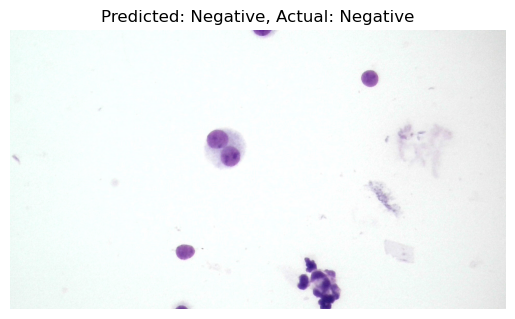

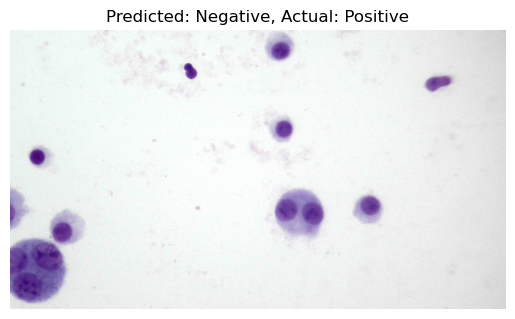

In [11]:
# Display random images based on "Predicted vs. Actual" classification
if true_positives:
    display_image(test_generator, random.choice(true_positives), "Predicted: Positive, Actual: Positive")
else:
    print("No True Positives found.")

if false_positives:
    display_image(test_generator, random.choice(false_positives), "Predicted: Positive, Actual: Negative")
else:
    print("No False Positives found.")

if true_negatives:
    display_image(test_generator, random.choice(true_negatives), "Predicted: Negative, Actual: Negative")
else:
    print("No True Negatives found.")

if false_negatives:
    display_image(test_generator, random.choice(false_negatives), "Predicted: Negative, Actual: Positive")
else:
    print("No False Negatives found.")